In [1]:
%tensorflow_version 2.x

In [2]:
from tensorflow.keras.datasets.cifar10 import load_data
(x_train, y_train), (x_test, y_test) = load_data()
x_train

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

In [3]:
# 一定要看資料有幾筆, 長啥樣子
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [4]:
classname = ["airplain", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

In [5]:
from tensorflow.keras.applications import MobileNet
cnn = MobileNet(include_top=False, input_shape=(32, 32, 3))
cnn.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 33, 33, 3)         0         
_________________________________________________________________
conv1 (Conv2D)               (None, 16, 16, 32)        864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 16, 16, 32)        128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 16, 16, 32)        288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 16, 16, 32) 

In [6]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout
for i in cnn.layers:
  i.trainable = False
x = Flatten()(cnn.output)
x = Dense(512, activation="relu")(x)
out = Dense(10, activation="softmax")(x)
model = Model(inputs=cnn.input, outputs=out)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 33, 33, 3)         0         
_________________________________________________________________
conv1 (Conv2D)               (None, 16, 16, 32)        864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 16, 16, 32)        128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 16, 16, 32)        288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 16, 16, 32)        128   

In [7]:
from tensorflow.keras.losses import SparseCategoricalCrossentropy
model.compile(loss=SparseCategoricalCrossentropy(),
              optimizer="adam", metrics=["accuracy"])

In [8]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
callback = [EarlyStopping(patience=3, restore_best_weights=True),
            ModelCheckpoint("Cifar10_MobileNet.h5", save_best_only=True)]
history = model.fit(x_train, y_train,
          batch_size=300, epochs=20,
          validation_split=0.1, callbacks=callback)

Epoch 1/20
150/150 [==============================] - 34s 228ms/step - loss: 2.1916 - accuracy: 0.1870 - val_loss: 2.1537 - val_accuracy: 0.2014
Epoch 2/20
150/150 [==============================] - 34s 224ms/step - loss: 2.1574 - accuracy: 0.2016 - val_loss: 2.1440 - val_accuracy: 0.2042
Epoch 3/20
150/150 [==============================] - 34s 225ms/step - loss: 2.1481 - accuracy: 0.2062 - val_loss: 2.1373 - val_accuracy: 0.2120
Epoch 4/20
150/150 [==============================] - 34s 227ms/step - loss: 2.1427 - accuracy: 0.2083 - val_loss: 2.1304 - val_accuracy: 0.2098
Epoch 5/20
150/150 [==============================] - 33s 221ms/step - loss: 2.1375 - accuracy: 0.2110 - val_loss: 2.1276 - val_accuracy: 0.2108
Epoch 6/20
150/150 [==============================] - 34s 227ms/step - loss: 2.1326 - accuracy: 0.2134 - val_loss: 2.1246 - val_accuracy: 0.2116
Epoch 7/20
150/150 [==============================] - 34s 227ms/step - loss: 2.1302 - accuracy: 0.2136 - val_loss: 2.1263 - val_ac

In [9]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 10s 31ms/step - loss: 2.1311 - accuracy: 0.2075


[2.131091833114624, 0.20749999582767487]

In [10]:
pre = model.predict(x_test)
pre

array([[0.10756026, 0.10621574, 0.063045  , ..., 0.12471042, 0.1909396 ,
        0.09488647],
       [0.10000772, 0.15779243, 0.06531836, ..., 0.14182076, 0.07146481,
        0.19868787],
       [0.1948888 , 0.19390818, 0.05979075, ..., 0.14252304, 0.11843257,
        0.14032955],
       ...,
       [0.00115297, 0.00416258, 0.17210019, ..., 0.09943752, 0.00496075,
        0.00425283],
       [0.198347  , 0.15016915, 0.07895434, ..., 0.08583186, 0.08223567,
        0.15087259],
       [0.06487428, 0.1277686 , 0.06742105, ..., 0.17942467, 0.08735286,
        0.1343406 ]], dtype=float32)

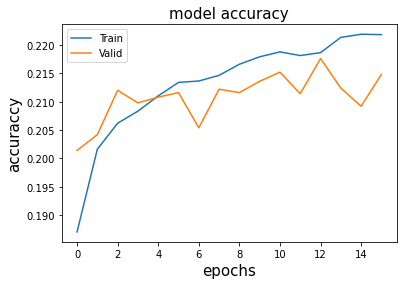

In [27]:
# model accuracy plot
import matplotlib.pyplot as plt
%matplotlib inline
plt.title("model accuracy", fontsize=15)
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.xlabel("epochs", fontsize=15)
plt.ylabel("accuraccy", fontsize=15)
plt.legend(['Train', 'Valid'])

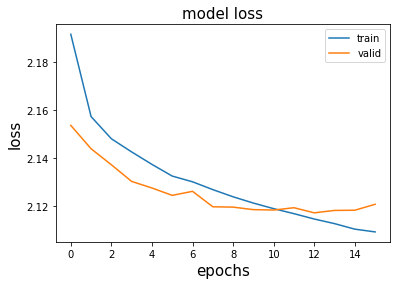

In [30]:
# model loss plot
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("model loss", fontsize=15)
plt.xlabel("epochs", fontsize=15)
plt.ylabel("loss", fontsize=15)
plt.legend(["train", "valid"], loc="best")

In [32]:
# 原本就可以使用的 history.history 函式, 會抓 loss, accuracy, val_loss, val_accuracy 四種數據
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])
